In [1]:
import pandas as pd

### Sensitivity analysis graphics
A univariate sensitivy analysis was conducted in Vensim for the following variables: 
Self agri workers[Coconut,Large], 
Fixed crop costs/ha[Rice], 
Fixed crop costs/ha[Maize],
Fixed crop costs/ha[Coconut],
Wage worker salary / day[Low skilled],
fixed shrimp costs,
Self agri workers[Rice,Small],
Self agri workers[Rice,Medium],
Self agri workers[Rice,Large],
Wage worker salary / day[High skilled],
Self agri workers[Coconut,Small],
Self agri workers[Coconut,Medium],
Self agri workers[Maize,Small],
Self agri workers[Maize,Medium],
Self agri workers[Maize,Large],
Education level,
Percentage population high skilled,
Machines

100 iterations for each variable were run, and the data was exported to xlsx. Below is an overview of the output.

It should be noted that this code could also have been put in functions, which would save a lot of lines. However, I liked that it was easy to for example change the y-axis per plot, to make sure it matched with the ABM.

In [2]:
# Import data
df = pd.read_excel("SD_sensitivity_analysis.xlsx")
df.head()

,Parameter,Value,Coconut farm[Small],Coconut farm[Medium],Coconut farm[Large],Maize farm[Small],Maize farm[Medium],Maize farm[Large],Migrated households,Rice farm[Small],Rice farm[Medium],Rice farm[Large],"Shrimp farm[Small,Without disease]","Shrimp farm[Small,With disease]","Shrimp farm[Medium,Without disease]","Shrimp farm[Medium,With disease]","Shrimp farm[Large,Without disease]","Shrimp farm[Large,With disease]",Migration rate
0,NaN,NaN,2.57725,23.43510,5.84858,16.96840,5.19203,0.197287,64.5771,8.72579,8.66404,1.85955,0.654014,0.558373,0.169914,0.134352,1.02513,0.011096,0.741692
1,Fixed crop costs/ha[Rice],438144.0,1.26399,7.42537,2.22594,8.58058,1.18372,0.197287,45.3893,36.28020,29.10400,5.52895,0.396903,0.340066,0.035099,0.014588,1.01493,0.002477,0.818443
2,Fixed crop costs/ha[Rice],5783850.0,1.26399,6.97443,2.22594,8.58058,8.85652,0.197287,46.0290,36.28020,21.23320,5.52895,0.396903,0.340066,0.299002,0.259729,1.01493,0.002477,0.815884
3,Fixed crop costs/ha[Rice],13414200.0,2.02802,14.36110,3.92352,14.09940,7.32625,0.197287,56.7074,19.64340,15.46660,3.76442,0.633957,0.541061,0.245128,0.207951,1.02513,0.020645,0.773171
4,Fixed crop costs/ha[Rice],17920900.0,1.73552,24.14230,6.34838,11.17860,4.95175,0.197287,77.5835,2.60591,8.22626,4.43909,0.546035,0.439896,0.161849,0.127632,1.02427,0.014408,0.689666


In [3]:
#Look at the variables
df['Parameter'].value_counts().sum

<bound method Series.sum of Parameter
Self agri workers[Coconut,Large]          200
Fixed crop costs/ha[Rice]                 100
Fixed crop costs/ha[Maize]                100
Fixed crop costs/ha[Coconut]              100
Wage worker salary / day[Low skilled]     100
fixed shrimp costs                        100
Self agri workers[Rice,Small]             100
Self agri workers[Rice,Medium]            100
Self agri workers[Rice,Large]             100
Wage worker salary / day[High skilled]    100
Self agri workers[Coconut,Small]          100
Self agri workers[Coconut,Medium]         100
Self agri workers[Maize,Small]            100
Self agri workers[Maize,Medium]           100
Self agri workers[Maize,Large]            100
Education level                           100
Percentage population high skilled        100
Machines                                  100
Name: count, dtype: int64>

#### Effect of production costs

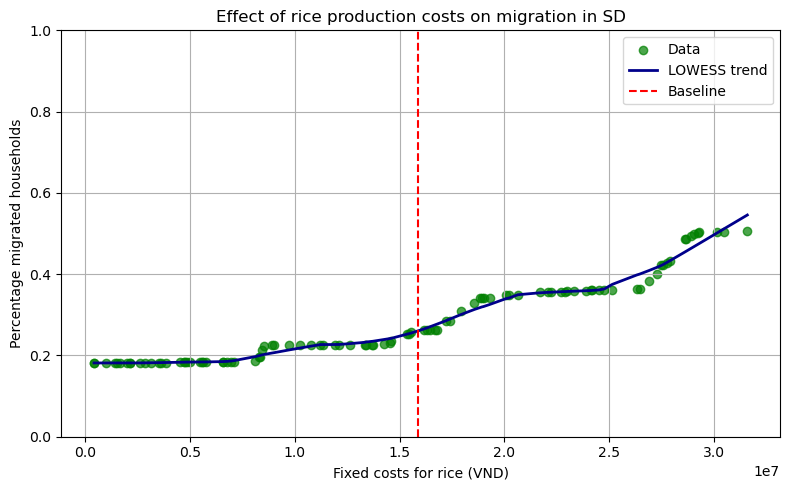

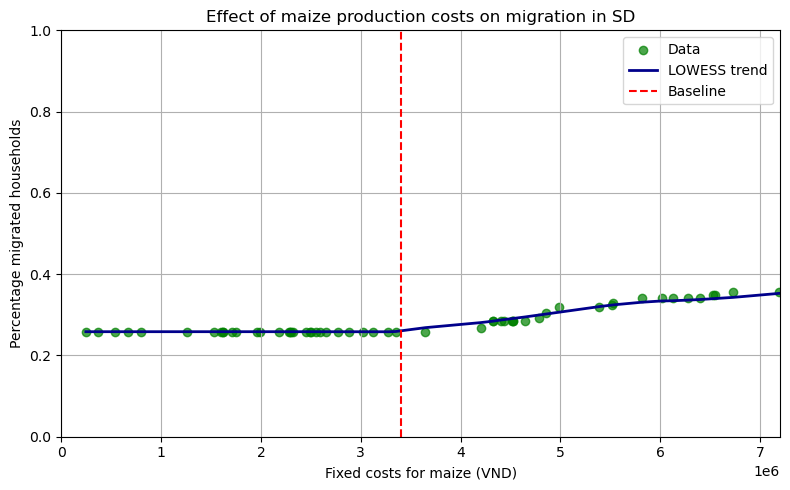

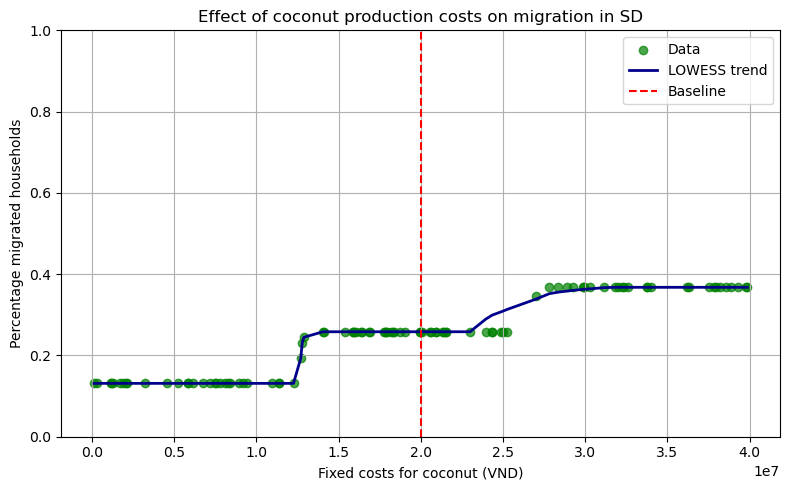

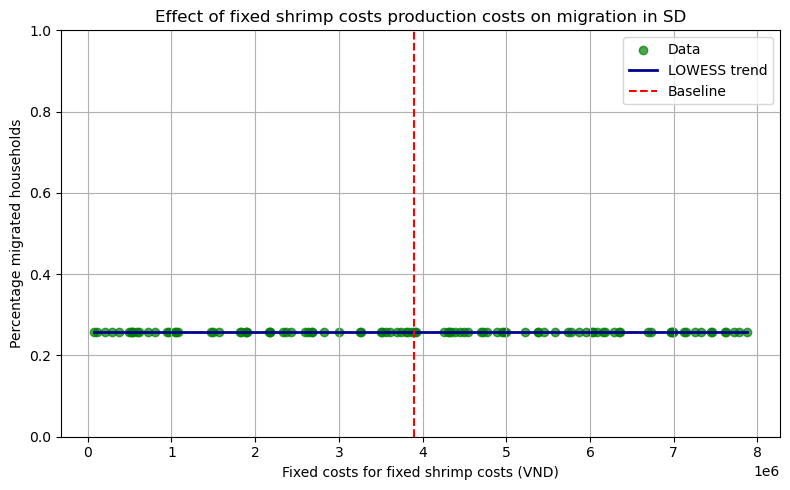

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

# These were the original values in the SD model
params_to_plot = [
    ("Fixed crop costs/ha[Rice]", 15900000),
    ("Fixed crop costs/ha[Maize]", 3400000),
    ("Fixed crop costs/ha[Coconut]", 20000000),
    ("fixed shrimp costs", 3900000)  
]

for param, vline in params_to_plot:
    subset = df[df["Parameter"] == param]

    x = subset["Value"]
    y = 1 - subset["Migration rate"]  # Change migration rate to the percentage of people who have actually migrated

    plt.figure(figsize=(8, 5))

    # Create scatterplot
    plt.scatter(x, y, alpha=0.7, color="green", label="Data")

    # LOWESS smoothing for the scatterplot
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=0.2)
    plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

    # Add a red baseline
    plt.axvline(x=vline, color='red', linestyle='--', linewidth=1.5, label="Baseline")

    match = re.search(r"\[(.*?)\]", param)
    title_text = match.group(1).lower() if match else param.lower()
    plt.title(f"Effect of {title_text} production costs on migration in SD")
    plt.xlabel(f"Fixed costs for {title_text} (VND)")
    plt.ylabel("Percentage migrated households")
    plt.ylim(0,1)

    # 👇 Set the correct x-as for maize, to match with the ABM graph
    if param == "Fixed crop costs/ha[Maize]":
        plt.xlim(0, 7.2e6)

    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


#### Wage worker salary

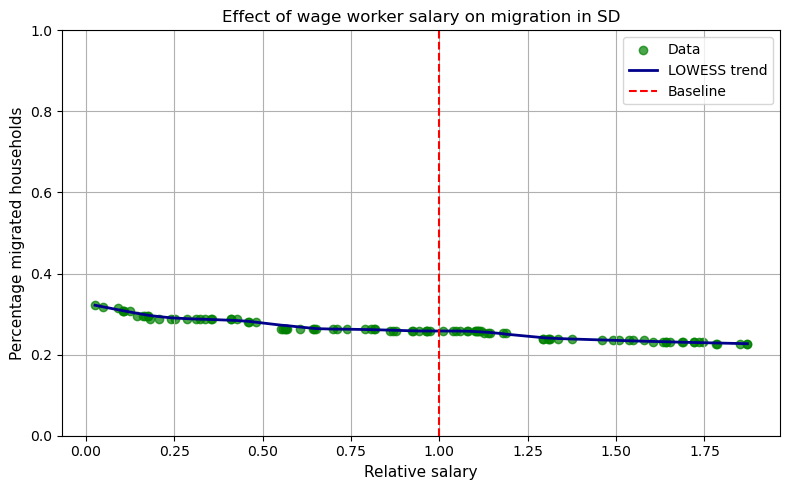

In [5]:
# Select correct parameter
subset = df[df["Parameter"] == "Wage worker salary / day[Low skilled]"]

# Create a baseline
x = subset["Value"] / 200000  # 1.0 = 200.000
y = 1 - subset["Migration rate"]  # Look at the percentage migrated instead of percentage who is still in the VMD

# Create scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="green", alpha=0.7, label="Data")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Create the vertical baseline 
plt.axvline(x=1.0, color='red', linestyle='--', linewidth=1.5, label="Baseline")


plt.xlabel("Relative salary", fontsize=11)
plt.ylabel("Percentage migrated households", fontsize=11)
plt.title("Effect of wage worker salary on migration in SD", fontsize=12)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Education level

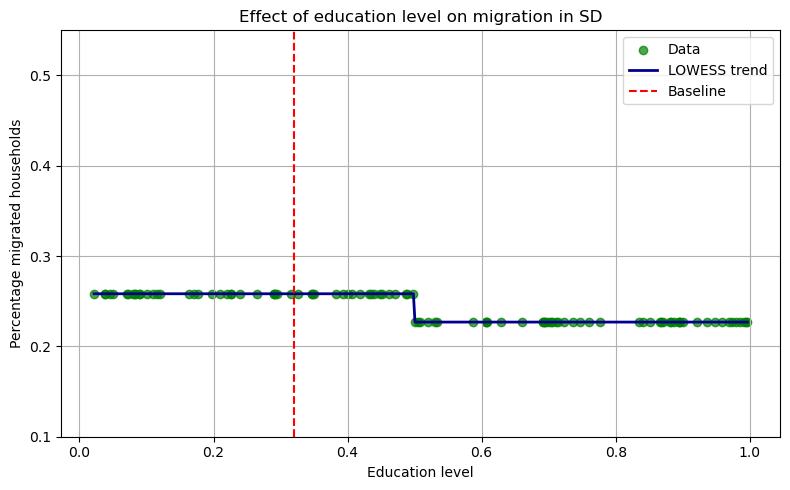

In [6]:
subset = df[df["Parameter"] == "Education level"]

x = subset["Value"]
y = 1 - subset["Migration rate"]  # Look at the percentage migrated instead of percentage who is still in the VMD

# Create scatterplot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="green", alpha=0.7, label="Data")

# LOWESS smoothing 
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Create vertical baseline
plt.axvline(x=0.32, color='red', linestyle='--', linewidth=1.5, label = "Baseline")

plt.xlabel("Education level")
plt.ylabel("Percentage migrated households")
plt.title("Effect of education level on migration in SD")
plt.ylim(0.1, 0.55)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Machine use

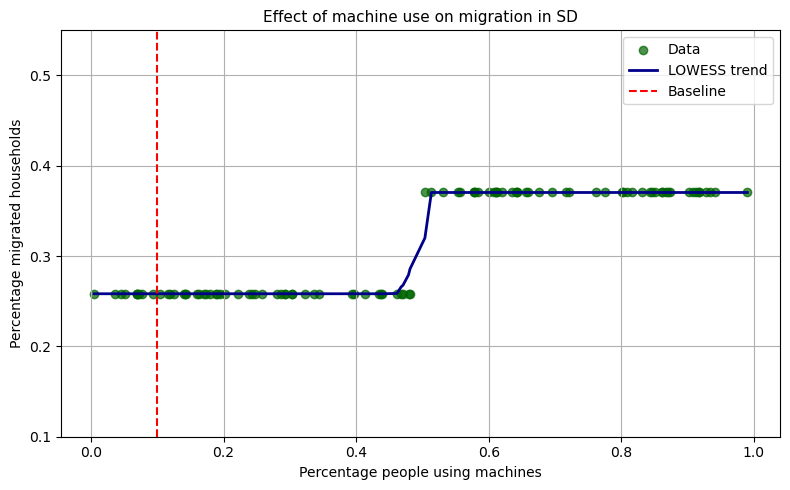

In [7]:
# Select the correct parameter
subset = df[df["Parameter"] == "Machines"]

x = subset["Value"]
y = 1 - subset["Migration rate"]  # 1 - migratiepercentage

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="darkgreen", alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Vertical line to represent the base value
plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1.5, label = "Baseline")

# Labels en stijl
plt.xlabel("Percentage people using machines", fontsize=10)
plt.ylabel("Percentage migrated households", fontsize=10)
plt.title("Effect of machine use on migration in SD", fontsize=11)
plt.grid(True)
plt.ylim(0.1, 0.55)
plt.legend()
plt.tight_layout()
plt.show()


## Model output
In addition to the sensitivity analysis, the normal model output was also analyzed, to compare this with the ABM results.

In [8]:
# Import data
df = pd.read_excel("SD_model_output.xlsx", header=None)

In [9]:
# Transpose the data, to get the variables as columns instead of rows
df = df.set_index(0).transpose()

In [10]:
# Check column names
for column in df.columns:
    print(column)

Time
Agri wage
Agri wage migrates
Antibiotic costs[Without disease]
Antibiotic costs[With disease]
Available number of wage workers
Average landless hh savings
Average savings non agri
Average shrimp farm profits[Small]
Average shrimp farm profits[Medium]
Average shrimp farm profits[Large]
average shrimp farm savings[Small]
average shrimp farm savings[Medium]
average shrimp farm savings[Large]
Average wage worker income
Base income for non agri households[Low skilled]
Base income for non agri households[High skilled]
Base income for service workers
Chance farmer changes crops[Rice,Small]
Chance farmer changes crops[Rice,Medium]
Chance farmer changes crops[Rice,Large]
Chance farmer changes crops[Coconut,Small]
Chance farmer changes crops[Coconut,Medium]
Chance farmer changes crops[Coconut,Large]
Chance farmer changes crops[Maize,Small]
Chance farmer changes crops[Maize,Medium]
Chance farmer changes crops[Maize,Large]
Chance farmer stops farming[Rice,Small]
Chance farmer stops farming[Ri

In [11]:
# Fill in the Nan values with 0
df = df.fillna(0)


C:\Users\sjuul\AppData\Local\Temp\ipykernel_25936\215701270.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


#### Number of wage workers over time

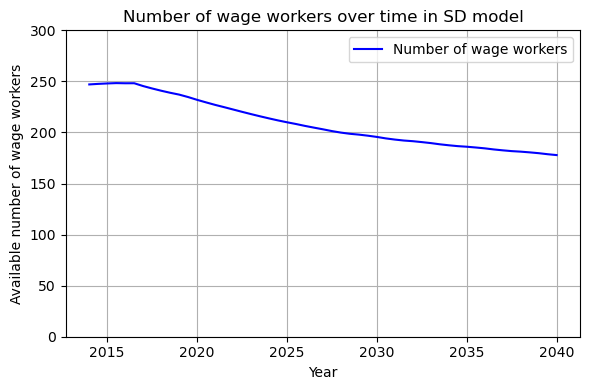

In [12]:
# Make sure the "Time" and "Available number of wage worker" columns are numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Available number of wage workers'] = pd.to_numeric(df['Available number of wage workers'], errors='coerce')

# Create a lineplot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Available number of wage workers'], label='Number of wage workers', color='blue')
plt.xlabel('Year')
plt.ylabel('Available number of wage workers')
plt.title('Number of wage workers over time in SD model')
plt.grid(True)
plt.legend()
plt.ylim(0, 300)  # Draai de y-as om van 2100 naar 0
plt.tight_layout()
plt.show()


#### Average savings of landless households

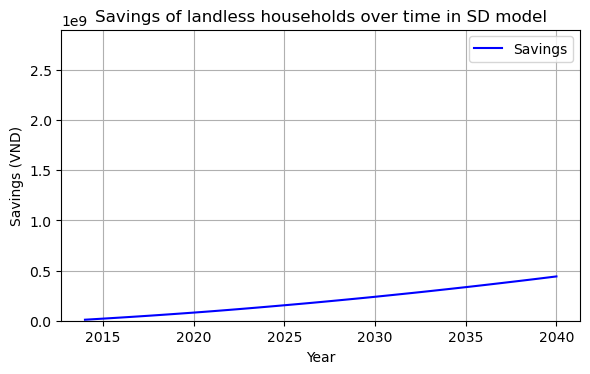

In [13]:
# Make sure the "Time" and "Average landless hh savings" columns are numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Average landless hh savings'] = pd.to_numeric(df['Average landless hh savings'], errors='coerce')

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Average landless hh savings'], label='Savings', color='blue')
plt.xlabel('Year')
plt.ylabel('Savings (VND)')
plt.title('Savings of landless households over time in SD model')
plt.grid(True)
plt.legend()
plt.ylim(0, 2.9e9)  # Change the y-axis to make it possible to compare the graph with the ABM result
plt.tight_layout()
plt.show()


#### Number of crop switches over time

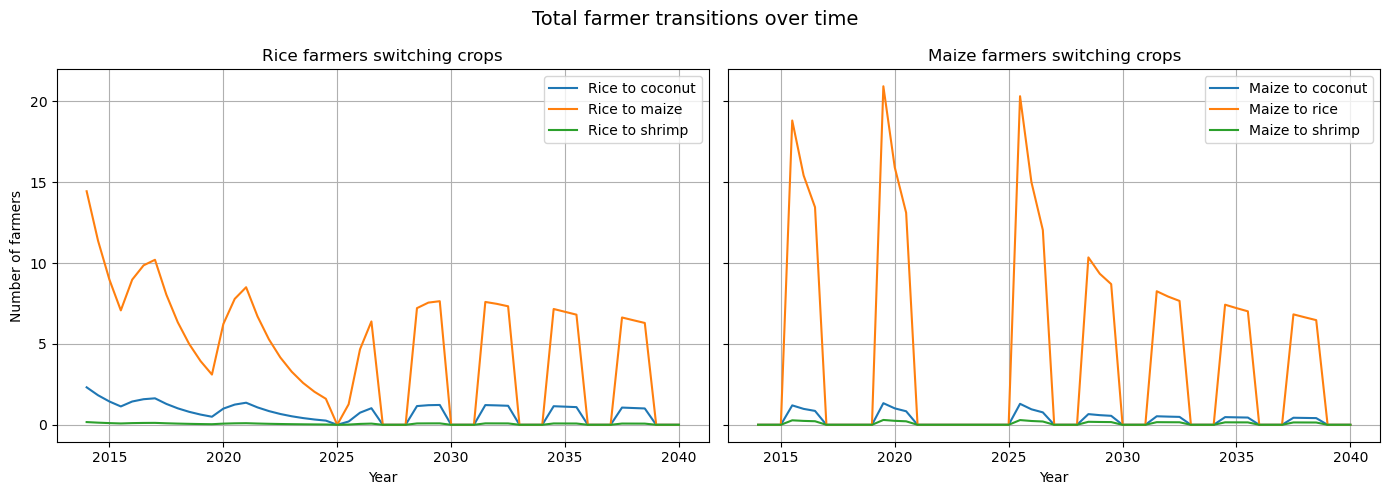

In [14]:
# Make sure the time column is numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Determine the possible switches that farmers can make
transitions_rice = ['coconut', 'maize', 'shrimp']
transitions_maize = ['coconut', 'rice', 'shrimp']

# Dataframes to save the switches
rice_transitions = {}
maize_transitions = {}

# Rice farmer switches
for t in transitions_rice:
    cols = [f'Rice farmer starts {t}[{size}]' for size in ['Small', 'Medium', 'Large']]
    for col in cols:
        df[col] = pd.to_numeric(df.get(col, 0), errors='coerce').fillna(0)
    rice_transitions[t] = df[cols].sum(axis=1)

# Maize farmer switches
for t in transitions_maize:
    cols = [f'Maize farmer starts {t}[{size}]' for size in ['Small', 'Medium', 'Large']]
    for col in cols:
        df[col] = pd.to_numeric(df.get(col, 0), errors='coerce').fillna(0)
    maize_transitions[t] = df[cols].sum(axis=1)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Create subplot for the rice farmers
for t in transitions_rice:
    axes[0].plot(df['Time'], rice_transitions[t], label=f"Rice to {t}")
axes[0].set_title("Rice farmers switching crops")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of farmers")
axes[0].grid(True)
axes[0].legend()

# Create subplot for the maize farmers
for t in transitions_maize:
    axes[1].plot(df['Time'], maize_transitions[t], label=f"Maize to {t}")
axes[1].set_title("Maize farmers switching crops")
axes[1].set_xlabel("Year")
axes[1].grid(True)
axes[1].legend()

# Create overall title and show plot
plt.suptitle("Total farmer transitions over time", fontsize=14)
plt.tight_layout()
plt.show()


#### Average income per wage worker over time

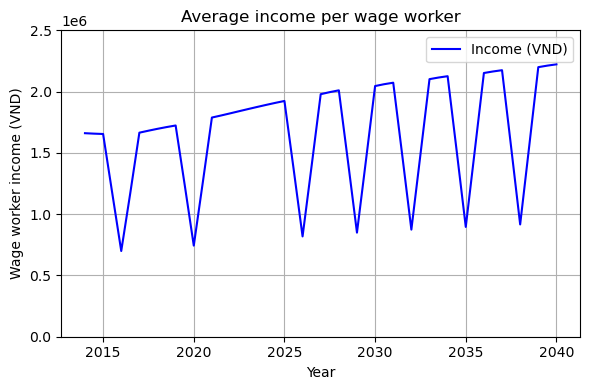

In [15]:
# Make sure that the correct columns are numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Average wage worker income'] = pd.to_numeric(df['Average wage worker income'], errors='coerce')

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Average wage worker income'], label='Income (VND)', color='blue')
plt.xlabel('Year')
plt.ylabel('Wage worker income (VND)')
plt.title('Average income per wage worker')
plt.grid(True)
plt.legend()
plt.ylim(0, 2.5e6) # Use correct y-axis range  
plt.tight_layout()
plt.show()


#### Migrated households

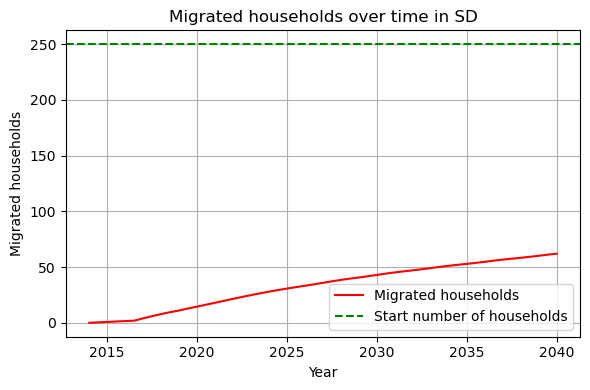

In [16]:
# Make sure the columns are numeric, and nan values are set to 0
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Migrated households'] = pd.to_numeric(df['Migrated households'], errors='coerce').fillna(0)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Migrated households'], label='Migrated households', color='red')
plt.axhline(y=250, color='green', linestyle='--', label='Start number of households')
plt.xlabel('Year')
plt.ylabel('Migrated households')
plt.title('Migrated households over time in SD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Number of farmers over time

C:\Users\sjuul\AppData\Local\Temp\ipykernel_25936\1026961258.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Shrimps[Small]'] = pd.to_numeric(df['Shrimp farm[Small,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Small,With disease]'], errors='coerce').fillna(0)
C:\Users\sjuul\AppData\Local\Temp\ipykernel_25936\1026961258.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Shrimps[Medium]'] = pd.to_numeric(df['Shrimp farm[Medium,Without disease]'], errors='coerce').fillna(0) + pd.to_nu

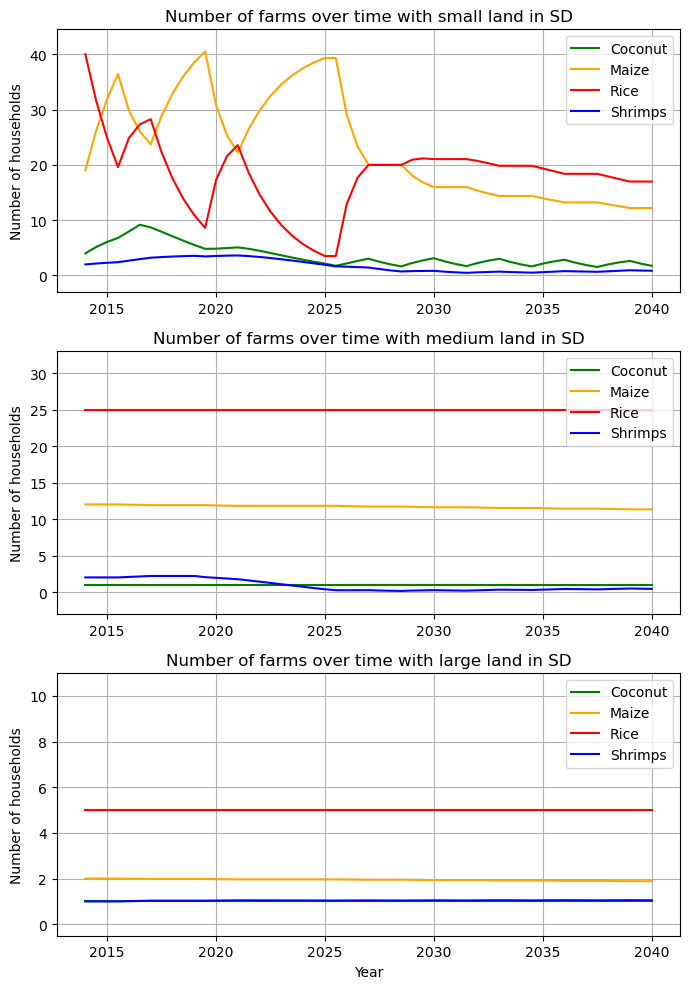

In [17]:
# Create three subplots, for each farm size 1
fig, axs = plt.subplots(3, 1, figsize=(7,10))

# Make sure all the columns are numeric
df['Coconut farm[Small]'] = pd.to_numeric(df['Coconut farm[Small]'], errors='coerce').fillna(0)
df['Maize farm[Small]'] = pd.to_numeric(df['Maize farm[Small]'], errors='coerce').fillna(0)
df['Rice farm[Small]'] = pd.to_numeric(df['Rice farm[Small]'], errors='coerce').fillna(0)
df['Coconut farm[Medium]'] = pd.to_numeric(df['Coconut farm[Medium]'], errors='coerce').fillna(0)
df['Maize farm[Medium]'] = pd.to_numeric(df['Maize farm[Medium]'], errors='coerce').fillna(0)
df['Rice farm[Medium]'] = pd.to_numeric(df['Rice farm[Medium]'], errors='coerce').fillna(0)
df['Coconut farm[Large]'] = pd.to_numeric(df['Coconut farm[Large]'], errors='coerce').fillna(0)
df['Maize farm[Large]'] = pd.to_numeric(df['Maize farm[Large]'], errors='coerce').fillna(0)
df['Rice farm[Large]'] = pd.to_numeric(df['Rice farm[Large]'], errors='coerce').fillna(0)
df['Shrimps[Small]'] = pd.to_numeric(df['Shrimp farm[Small,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Small,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Medium]'] = pd.to_numeric(df['Shrimp farm[Medium,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Medium,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Large]'] = pd.to_numeric(df['Shrimp farm[Large,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Large,With disease]'], errors='coerce').fillna(0)

# Subplot for small farmers
axs[0].plot(df['Time'], df['Coconut farm[Small]'], label='Coconut', color='green')
axs[0].plot(df['Time'], df['Maize farm[Small]'], label='Maize', color='orange')
axs[0].plot(df['Time'], df['Rice farm[Small]'], label='Rice', color='red')
axs[0].plot(df['Time'], df['Shrimps[Small]'], label='Shrimps', color='blue')
axs[0].set_title('Number of farms over time with small land in SD')
axs[0].set_ylabel('Number of households')
axs[0].grid(True)
axs[0].set_ylim(-3, 44.5)
axs[0].legend()

# Subplot for medium farmers
axs[1].plot(df['Time'], df['Coconut farm[Medium]'], label='Coconut', color='green')
axs[1].plot(df['Time'], df['Maize farm[Medium]'], label='Maize', color='orange')
axs[1].plot(df['Time'], df['Rice farm[Medium]'], label='Rice', color='red')
axs[1].plot(df['Time'], df['Shrimps[Medium]'], label='Shrimps', color='blue')
axs[1].set_title('Number of farms over time with medium land in SD')
axs[1].set_ylabel('Number of households')
axs[1].legend()
axs[1].set_ylim(-3, 33)
axs[1].grid(True)

# Subplot for large farmers
axs[2].plot(df['Time'], df['Coconut farm[Large]'], label='Coconut', color='green')
axs[2].plot(df['Time'], df['Maize farm[Large]'], label='Maize', color='orange')
axs[2].plot(df['Time'], df['Rice farm[Large]'], label='Rice', color='red')
axs[2].plot(df['Time'], df['Shrimps[Large]'], label='Shrimps', color='blue')
axs[2].set_title('Number of farms over time with large land in SD')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Number of households')
axs[2].legend()
axs[2].set_ylim(-0.5, 11)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


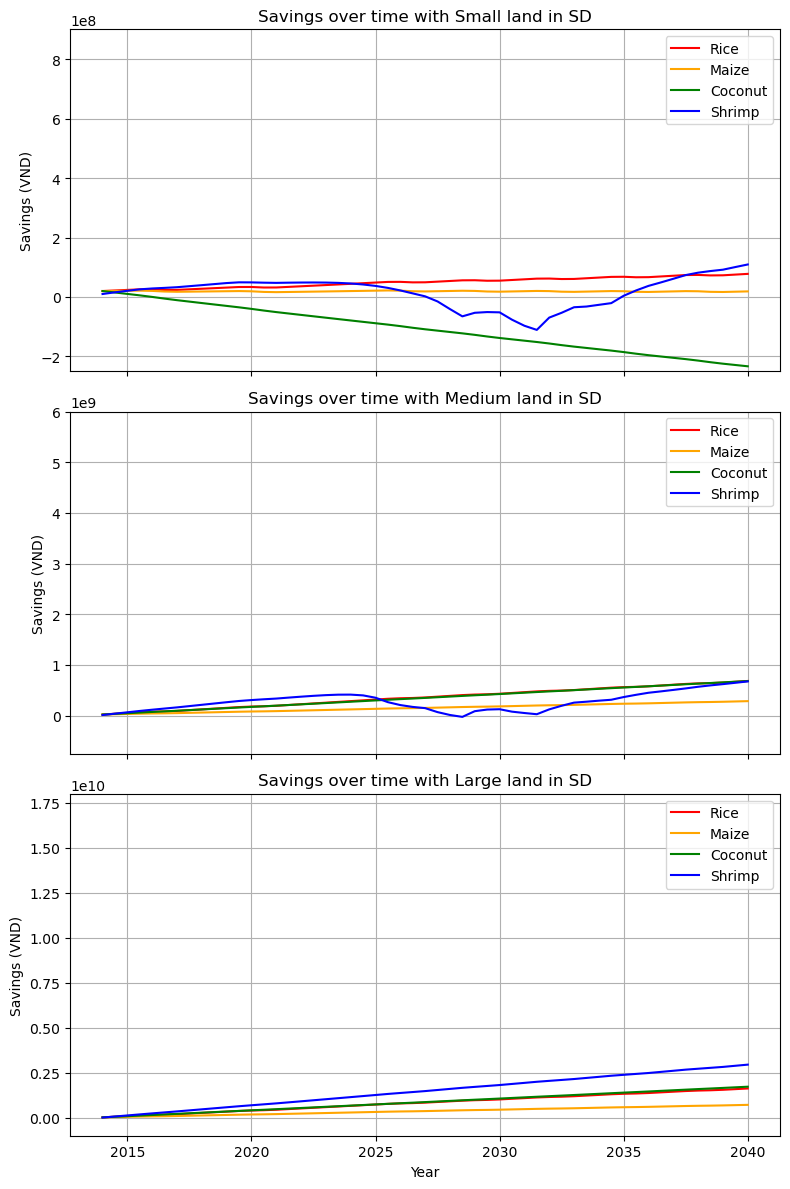

In [18]:
# Select the correct columns
savings_columns = {
    'Small': {
        'Rice': '"Savings/farm"[Rice,Small]',
        'Maize': '"Savings/farm"[Maize,Small]',
        'Coconut': '"Savings/farm"[Coconut,Small]',
        'Shrimp': 'average shrimp farm savings[Small]'
    },
    'Medium': {
        'Rice': '"Savings/farm"[Rice,Medium]',
        'Maize': '"Savings/farm"[Maize,Medium]',
        'Coconut': '"Savings/farm"[Coconut,Medium]',
        'Shrimp': 'average shrimp farm savings[Medium]'
    },
    'Large': {
        'Rice': '"Savings/farm"[Rice,Large]',
        'Maize': '"Savings/farm"[Maize,Large]',
        'Coconut': '"Savings/farm"[Coconut,Large]',
        'Shrimp': 'average shrimp farm savings[Large]'
    }
}

crop_colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Set all columns to numeric
for size in savings_columns:
    for crop in savings_columns[size]:
        col = savings_columns[size][crop]
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Set correct y-axis limits, to make it possible to compare the plot with the ABM results
ylim_dict = {
    'Small': (-2.5e8, 9e8),
    'Medium': (-0.75e9, 6e9),
    'Large': (-0.1e10, 1.8e10)
}

# Create three subplots within 1 plot
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for i, size in enumerate(['Small', 'Medium', 'Large']):
    ax = axs[i]
    for crop in ['Rice', 'Maize', 'Coconut', 'Shrimp']:
        ax.plot(df['Time'], df[savings_columns[size][crop]], label=crop, color=crop_colors[crop])
    
    ax.set_title(f'Savings over time with {size} land in SD')
    ax.set_ylabel('Savings (VND)')
    ax.set_ylim(ylim_dict[size])
    ax.grid(True)
    ax.legend()

# Show plot
axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()


#### Profit per farm

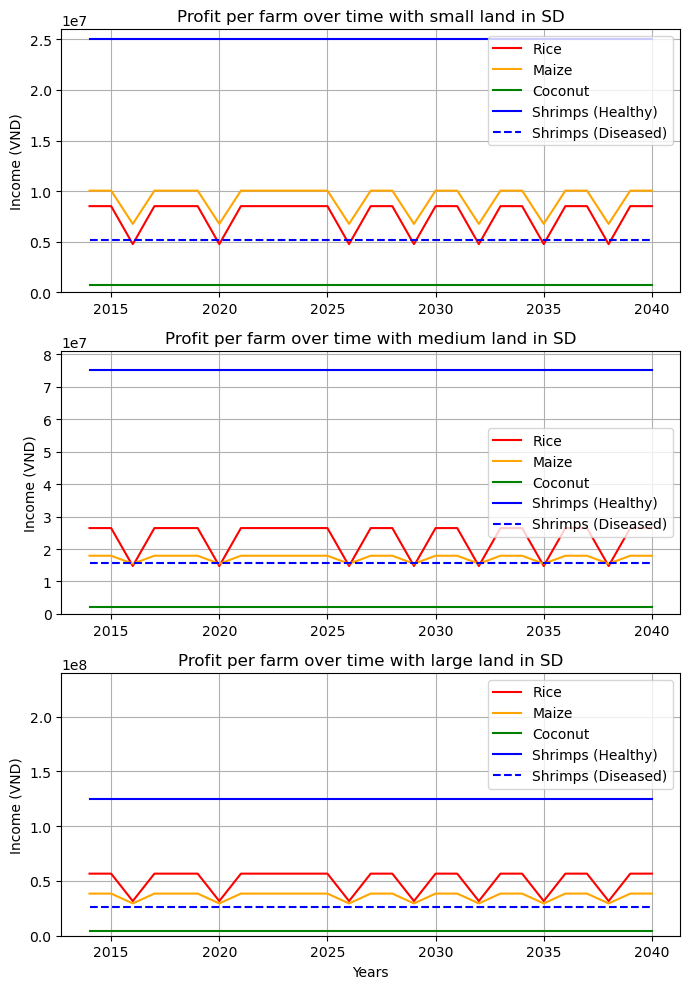

In [19]:
# Select correct columns
cols_to_convert = [
    "Profit per shrimp farm[Small,Without disease]",
    "Profit per shrimp farm[Small,With disease]",
    "Profit per shrimp farm[Medium,Without disease]",
    "Profit per shrimp farm[Medium,With disease]",
    "Profit per shrimp farm[Large,Without disease]",
    "Profit per shrimp farm[Large,With disease]",
    '"Profit/farm"[Rice,Small]',
    '"Profit/farm"[Rice,Medium]',
    '"Profit/farm"[Rice,Large]',
    '"Profit/farm"[Coconut,Small]',
    '"Profit/farm"[Coconut,Medium]',
    '"Profit/farm"[Coconut,Large]',
    '"Profit/farm"[Maize,Small]',
    '"Profit/farm"[Maize,Medium]',
    '"Profit/farm"[Maize,Large]',
    "Shrimp farm[Small,Without disease]",
    "Shrimp farm[Small,With disease]",
    "Shrimp farm[Medium,Without disease]",
    "Shrimp farm[Medium,With disease]",
    "Shrimp farm[Large,Without disease]",
    "Shrimp farm[Large,With disease]"
]

# Convert the columns to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Create three subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Set correct colours to match with the ABM results
colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Small land farmers
axs[0].plot(df['Time'], df['"Profit/farm"[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['"Profit/farm"[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['"Profit/farm"[Coconut,Small]'] / 6, label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'], df['Profit per shrimp farm[Small,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[0].plot(df['Time'], df['Profit per shrimp farm[Small,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[0].set_title('Profit per farm over time with small land in SD')
axs[0].set_ylabel('Income (VND)')
axs[0].set_ylim(0, 2.6e7)
axs[0].legend()
axs[0].grid(True)

# Medium farmers
axs[1].plot(df['Time'], df['"Profit/farm"[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['"Profit/farm"[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['"Profit/farm"[Coconut,Medium]'] / 6, label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'], df['Profit per shrimp farm[Medium,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[1].plot(df['Time'], df['Profit per shrimp farm[Medium,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[1].set_title('Profit per farm over time with medium land in SD')
axs[1].set_ylabel('Income (VND)')
axs[1].set_ylim(0, 8.1e7)
axs[1].legend()
axs[1].grid(True)

# Large farmers
axs[2].plot(df['Time'], df['"Profit/farm"[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['"Profit/farm"[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['"Profit/farm"[Coconut,Large]'] / 6, label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'], df['Profit per shrimp farm[Large,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[2].plot(df['Time'], df['Profit per shrimp farm[Large,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[2].set_title('Profit per farm over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Income (VND)')
axs[2].set_ylim(0, 2.4e8)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


#### Yield over time

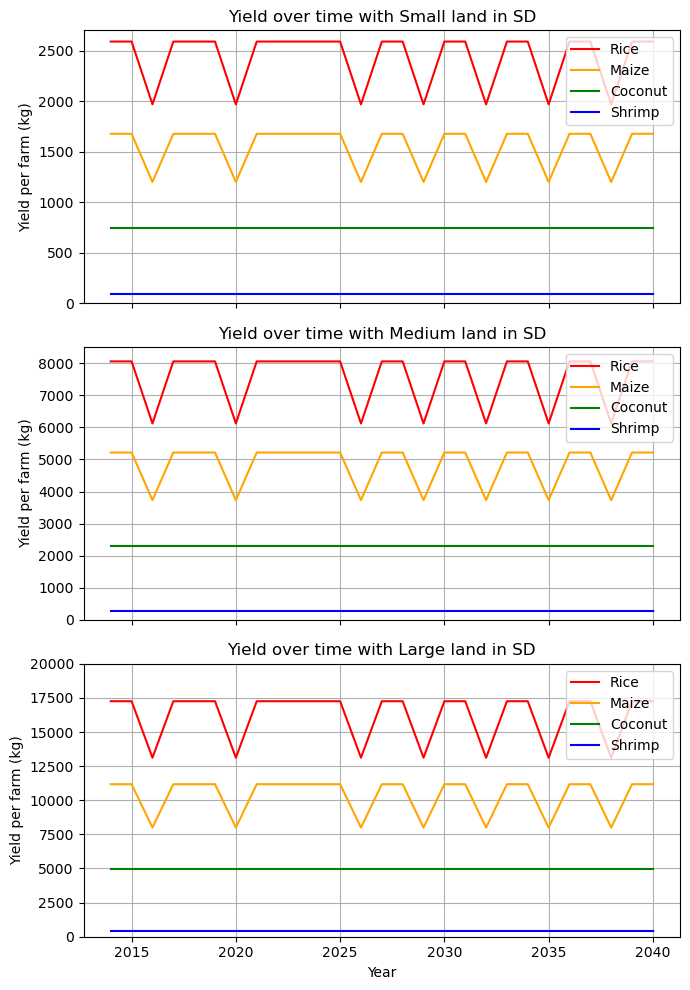

In [20]:
# Select relevant columns and set them to numeric
yield_cols = [
    '"Crop yield/farm"[Rice,Small]', '"Crop yield/farm"[Rice,Medium]', '"Crop yield/farm"[Rice,Large]',
    '"Crop yield/farm"[Coconut,Small]', '"Crop yield/farm"[Coconut,Medium]', '"Crop yield/farm"[Coconut,Large]',
    '"Crop yield/farm"[Maize,Small]', '"Crop yield/farm"[Maize,Medium]', '"Crop yield/farm"[Maize,Large]',
    '"Shrimp yield/farm"[Small,Without disease]', '"Shrimp yield/farm"[Small,With disease]',
    '"Shrimp yield/farm"[Medium,Without disease]', '"Shrimp yield/farm"[Medium,With disease]',
    '"Shrimp yield/farm"[Large,Without disease]', '"Shrimp yield/farm"[Large,With disease]'
]

for col in yield_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Set colors to match with the ABM
colors = {
    'Rice': 'red',
    'Coconut': 'green',
    'Maize': 'orange',
    'Shrimp': 'blue'
}

# Plot
fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)

# Small
axs[0].plot(df['Time'], df['"Crop yield/farm"[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['"Crop yield/farm"[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['"Crop yield/farm"[Coconut,Small]'] , label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'],
            df['"Shrimp yield/farm"[Small,Without disease]'] + df['"Shrimp yield/farm"[Small,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[0].set_title('Yield over time with Small land in SD')
axs[0].set_ylabel('Yield per farm (kg)')
axs[0].set_ylim(0, 2700)
axs[0].legend()
axs[0].grid(True)

# Medium
axs[1].plot(df['Time'], df['"Crop yield/farm"[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['"Crop yield/farm"[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['"Crop yield/farm"[Coconut,Medium]'] , label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'],
            df['"Shrimp yield/farm"[Medium,Without disease]'] + df['"Shrimp yield/farm"[Medium,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[1].set_title('Yield over time with Medium land in SD')
axs[1].set_ylabel('Yield per farm (kg)')
axs[1].set_ylim(0, 8500)
axs[1].legend()
axs[1].grid(True)

# Large
axs[2].plot(df['Time'], df['"Crop yield/farm"[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['"Crop yield/farm"[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['"Crop yield/farm"[Coconut,Large]'] , label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'],
            df['"Shrimp yield/farm"[Large,Without disease]'] + df['"Shrimp yield/farm"[Large,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[2].set_title('Yield over time with Large land in SD')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Yield per farm (kg)')
axs[2].set_ylim(0, 20000)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


#### Wage worker costs per farm

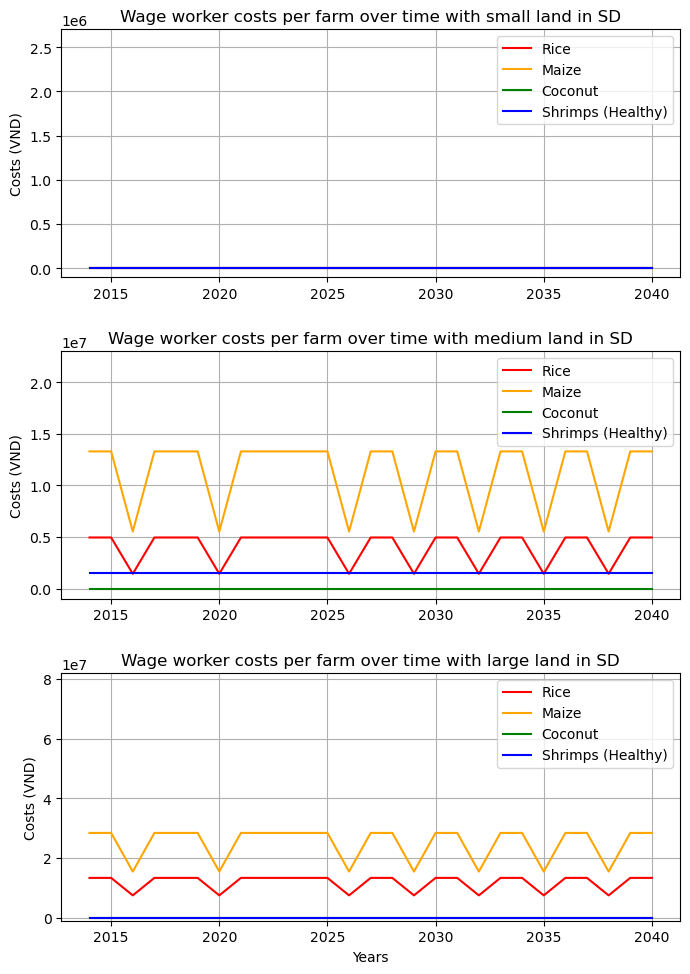

In [21]:
# Select correct columns and set them to numeric
wage_cols = [
    "Wage worker costs per farm[Rice,Small]",
    "Wage worker costs per farm[Rice,Medium]",
    "Wage worker costs per farm[Rice,Large]",
    "Wage worker costs per farm[Coconut,Small]",
    "Wage worker costs per farm[Coconut,Medium]",
    "Wage worker costs per farm[Coconut,Large]",
    "Wage worker costs per farm[Maize,Small]",
    "Wage worker costs per farm[Maize,Medium]",
    "Wage worker costs per farm[Maize,Large]",
    "Wage worker costs per shrimp farm[Small,Without disease]",
    "Wage worker costs per shrimp farm[Medium,Without disease]",
    "Wage worker costs per shrimp farm[Large,Without disease]"
]

for col in wage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Create three subplots for small, medium, and large farms
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Klein
axs[0].plot(df['Time'], df['Wage worker costs per farm[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['Wage worker costs per farm[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['Wage worker costs per farm[Coconut,Small]'] / 6, label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'], df['Wage worker costs per shrimp farm[Small,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[0].set_title('Wage worker costs per farm over time with small land in SD')
axs[0].set_ylabel('Costs (VND)')
axs[0].set_ylim(-0.1e6, 2.7e6)
axs[0].legend()
axs[0].grid(True)

# Medium
axs[1].plot(df['Time'], df['Wage worker costs per farm[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['Wage worker costs per farm[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['Wage worker costs per farm[Coconut,Medium]'] / 6, label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'], df['Wage worker costs per shrimp farm[Medium,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[1].set_title('Wage worker costs per farm over time with medium land in SD')
axs[1].set_ylabel('Costs (VND)')
axs[1].set_ylim(-0.1e7, 2.3e7)
axs[1].legend()
axs[1].grid(True)

# Large
axs[2].plot(df['Time'], df['Wage worker costs per farm[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['Wage worker costs per farm[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['Wage worker costs per farm[Coconut,Large]'] / 6, label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'], df['Wage worker costs per shrimp farm[Large,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[2].set_title('Wage worker costs per farm over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Costs (VND)')
axs[2].set_ylim(-0.1e7, 8.2e7)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
